In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import files

Bringing in the data file to assign as the dataset

In [50]:
file_name = 'poker_data.csv'
files.upload()

#read the data to dataset
dataset = pd.read_csv(file_name, delimiter=',')

Saving poker_data.csv to poker_data (1).csv


Making sure our data has the right height and width

In [51]:
# print off rows and columns to make sure the dimensions are correct
print("Rows: %s" % dataset.shape[0])
print("Columns: %s" % dataset.shape[1])

# head shows the first n amount of rows, in this case n=10
dataset.head(10)

Rows: 25010
Columns: 11


,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card 5,Poker Hand
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9
5,1,2,1,4,1,5,1,3,1,6,8
6,1,9,1,12,1,10,1,11,1,13,8
7,2,1,2,2,2,3,2,4,2,5,8
8,3,5,3,6,3,9,3,7,3,8,8
9,4,1,4,4,4,2,4,3,4,5,8


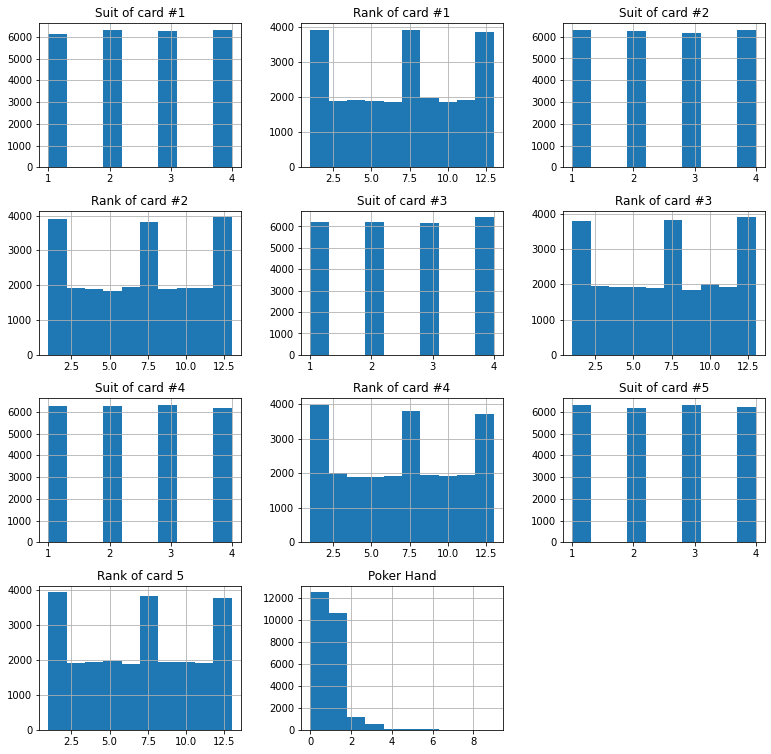

In [52]:
plt.rcParams["figure.figsize"] = ((13,13))
dataset.hist()
plt.show()

In [53]:
dataset.describe()

,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card 5,Poker Hand
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


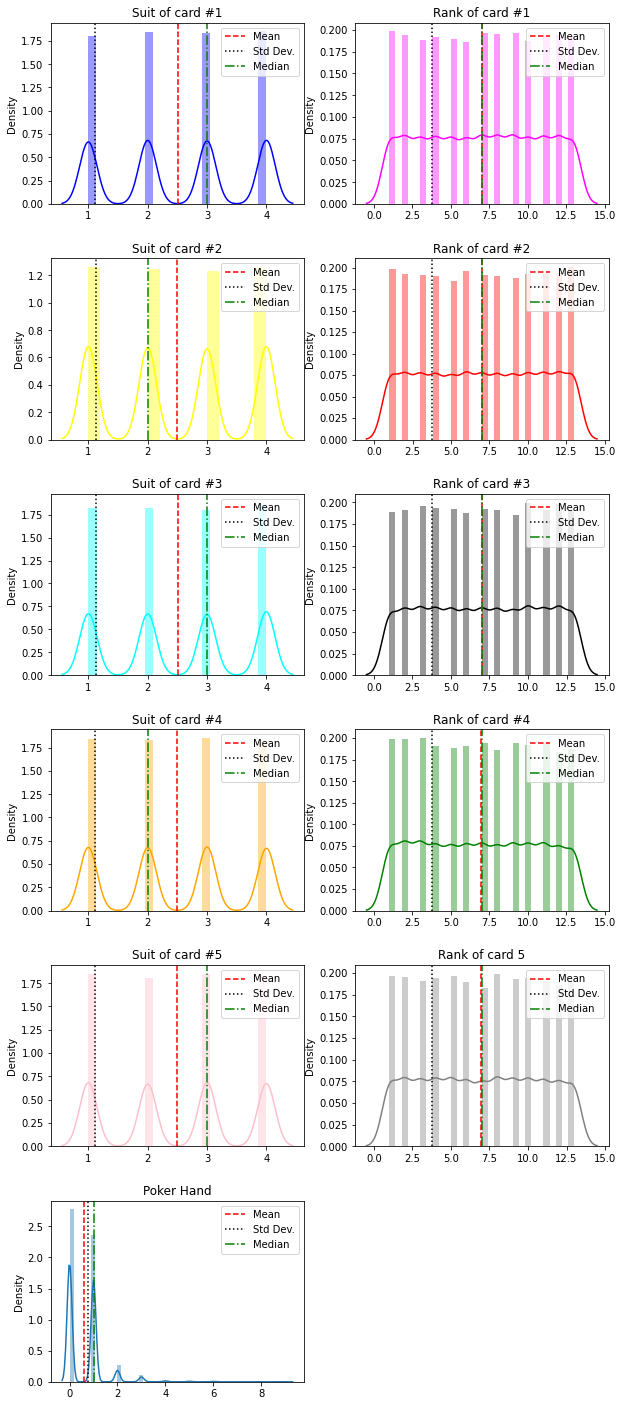

In [54]:
columns = ['Suit of card #1', 'Rank of card #1', 'Suit of card #2', 'Rank of card #2', 'Suit of card #3', 'Rank of card #3', 'Suit of card #4', 'Rank of card #4','Suit of card #5', 'Rank of card 5', 'Poker Hand']
c_length  = len(columns)
c_colors  = ["blue", "magenta", "yellow", "red", "cyan", "black", "orange","green", "pink", "grey"]

import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 25))
for i, j, k in itertools.zip_longest(columns, range(c_length), c_colors):
    plt.subplot(6, 2, j+1)
    sns.distplot(dataset[i], color = k)
    plt.title(i) # Title of column represented
    plt.xlabel("") # clears the x axis label
    plt.subplots_adjust(hspace = 0.3)
    plt.axvline(dataset[i].mean(), color = "red", linestyle="dashed", label="Mean")
    plt.axvline(dataset[i].std(), color = "black", linestyle="dotted", label="Std Dev.")
    plt.axvline(dataset[i].median(), color = "green", linestyle="dashdot", label="Median")
    plt.legend(loc="upper right")

Text(0, 0.5, 'Amount')

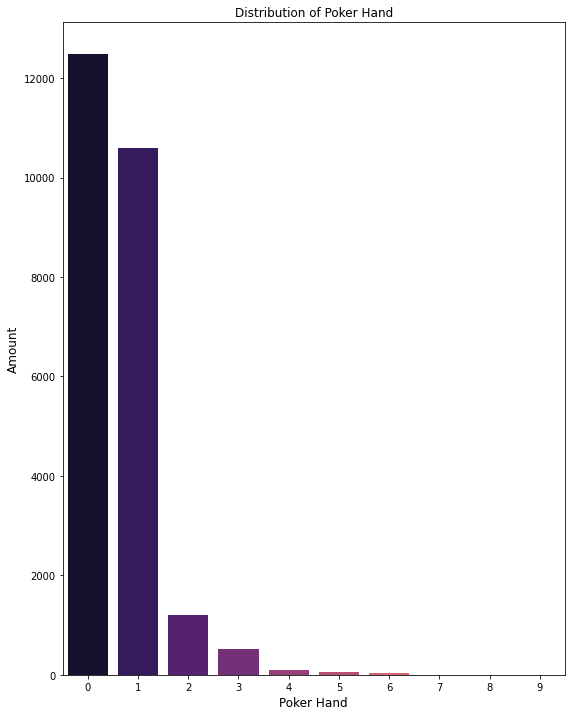

In [55]:
# Distribution of Poker Hand
plt.figure(figsize=(9, 12))
axs = sns.countplot(dataset['Poker Hand'], palette='magma')
plt.title('Distribution of Poker Hand', fontsize=12)
plt.xlabel('Poker Hand', fontsize=12)
plt.ylabel('Amount', fontsize=12)

Next I will create a correlation map

Honestly I may change my dataset after looking at this, I would like to see more variation

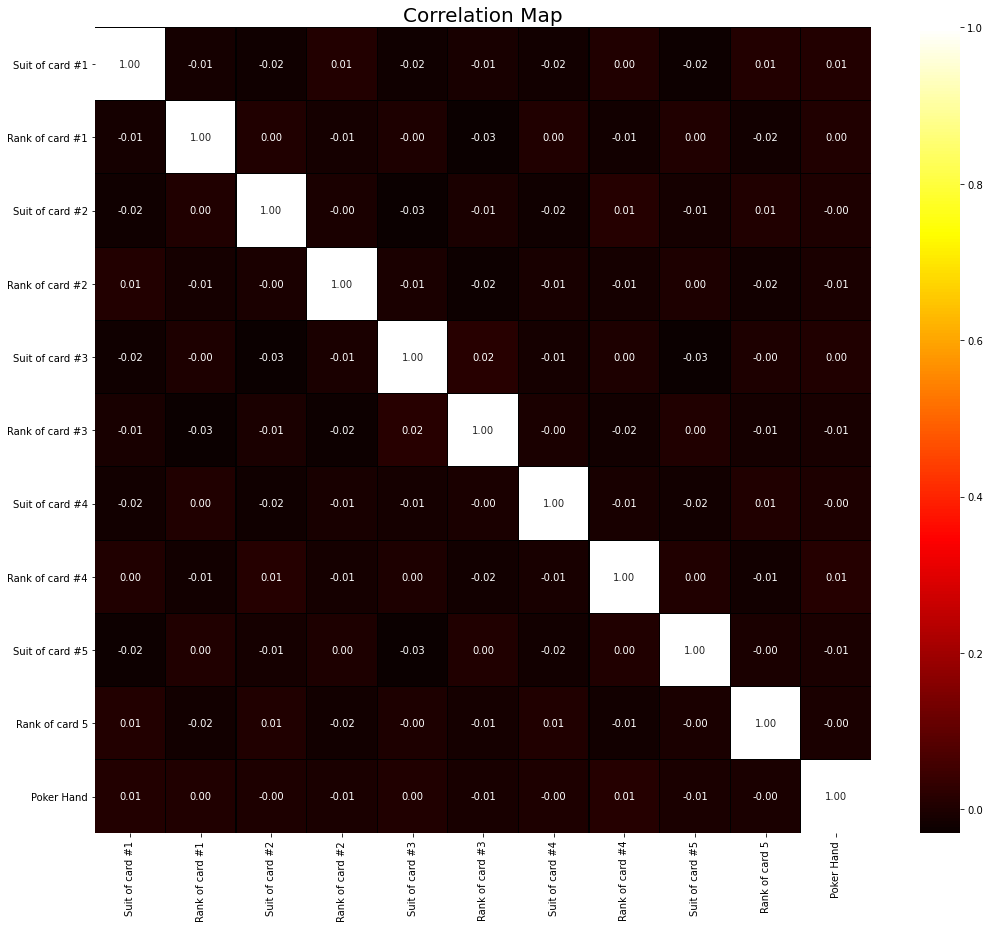

In [56]:
# Correlation
plt.figure(figsize=(15, 13))
sns.heatmap(data=dataset.corr(), annot=True, cmap="hot", linewidths=0.1, fmt=".2f", linecolor="black")
plt.title("Correlation Map", fontsize=20)
plt.tight_layout()
plt.show()

# Honestly I may change my dataset after looking at this, I would like to see more variation

In [57]:
from sklearn import preprocessing
# Normalizing data between (0-1)
x = dataset.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

# Insert column names back into data
normalized_df = pd.DataFrame(x_scaled, columns=dataset.columns)


# Output the first 10 rows to check data is normalized
normalized_df.head(10)


,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card 5,Poker Hand
0,0.000000,0.750000,0.000000,0.833333,0.000000,1.000000,0.000000,0.916667,0.000000,0.000000,1.000000
1,0.333333,0.833333,0.333333,1.000000,0.333333,0.750000,0.333333,0.916667,0.333333,0.000000,1.000000
2,0.666667,0.916667,0.666667,0.833333,0.666667,1.000000,0.666667,0.750000,0.666667,0.000000,1.000000
3,1.000000,0.750000,1.000000,0.833333,1.000000,0.000000,1.000000,1.000000,1.000000,0.916667,1.000000
4,1.000000,0.000000,1.000000,1.000000,1.000000,0.916667,1.000000,0.833333,1.000000,0.750000,1.000000
5,0.000000,0.083333,0.000000,0.250000,0.000000,0.333333,0.000000,0.166667,0.000000,0.416667,0.888889
6,0.000000,0.666667,0.000000,0.916667,0.000000,0.750000,0.000000,0.833333,0.000000,1.000000,0.888889
7,0.333333,0.000000,0.333333,0.083333,0.333333,0.166667,0.333333,0.250000,0.333333,0.333333,0.888889
8,0.666667,0.333333,0.666667,0.416667,0.666667,0.666667,0.666667,0.500000,0.666667,0.583333,0.888889
9,1.000000,0.000000,1.000000,0.250000,1.000000,0.083333,1.000000,0.166667,1.000000,0.333333,0.888889


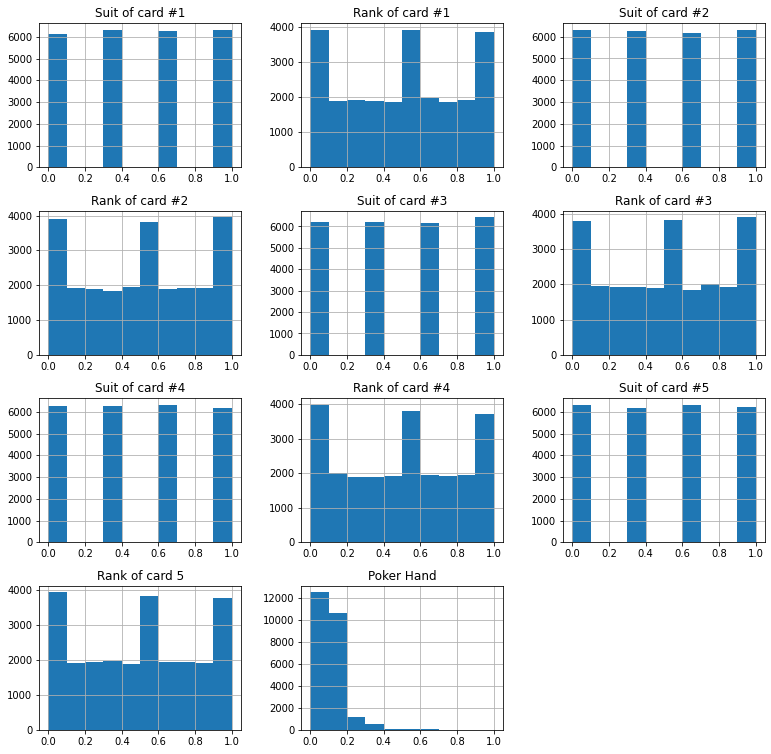

In [58]:
normalized_df.hist()
plt.show()

Below was my first failed attempt at normalizing my data, It was normalized but it normalized based on the max of all the data, i wanted it normalized on the max of just each column.

In [59]:
# Normalized data between (0-1)

column_maxes = dataset.max()
ds_max = column_maxes.max()
normalized_dataset = dataset / ds_max

# Output the first 10 rows to check data is normalized
normalized_dataset.head(10)


,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card 5,Poker Hand
0,0.076923,0.769231,0.076923,0.846154,0.076923,1.000000,0.076923,0.923077,0.076923,0.076923,0.692308
1,0.153846,0.846154,0.153846,1.000000,0.153846,0.769231,0.153846,0.923077,0.153846,0.076923,0.692308
2,0.230769,0.923077,0.230769,0.846154,0.230769,1.000000,0.230769,0.769231,0.230769,0.076923,0.692308
3,0.307692,0.769231,0.307692,0.846154,0.307692,0.076923,0.307692,1.000000,0.307692,0.923077,0.692308
4,0.307692,0.076923,0.307692,1.000000,0.307692,0.923077,0.307692,0.846154,0.307692,0.769231,0.692308
5,0.076923,0.153846,0.076923,0.307692,0.076923,0.384615,0.076923,0.230769,0.076923,0.461538,0.615385
6,0.076923,0.692308,0.076923,0.923077,0.076923,0.769231,0.076923,0.846154,0.076923,1.000000,0.615385
7,0.153846,0.076923,0.153846,0.153846,0.153846,0.230769,0.153846,0.307692,0.153846,0.384615,0.615385
8,0.230769,0.384615,0.230769,0.461538,0.230769,0.692308,0.230769,0.538462,0.230769,0.615385,0.615385
9,0.307692,0.076923,0.307692,0.307692,0.307692,0.153846,0.307692,0.230769,0.307692,0.384615,0.615385


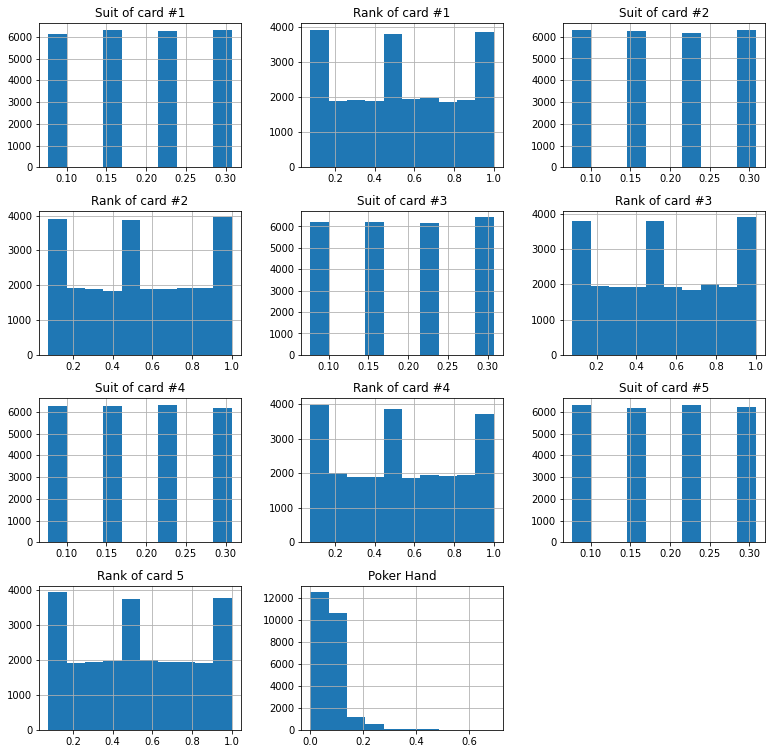

In [60]:
normalized_dataset.hist()
plt.show()